In [2]:
# Authors: Jeroen BUil
# License: BSD-3-Clause

In [3]:
import glob as glob 
import numpy as np
import matplotlib.pyplot as plt
import mne

from IPython.display import clear_output

from deegtal_coding_task.config import *
# from deegtal_coding_task.dimensionality_reduction import get_tsne_df, plot_dim_reduction

from mne.viz import set_browser_backend
set_browser_backend("matplotlib")


2024-10-22 16:12:02.856 | INFO     | deegtal_coding_task.config:<module>:11 - PROJ_ROOT path is: C:\Users\buil003\Documents\Code\deegtal_coding_task


Using matplotlib as 2D backend.


In [4]:
folder_raw_group_1 = RAW_DATA_DIR / 'Group1'
folder_raw_group_2 = RAW_DATA_DIR / 'Group2'

files_raw_group_1 = list(folder_raw_group_1.glob('*.edf'))
files_raw_group_2 = list(folder_raw_group_2.glob('*.edf'))

files_raw = [files_raw_group_1, files_raw_group_2]
print(files_raw[0], '\n', files_raw[1])


[WindowsPath('C:/Users/buil003/Documents/Code/deegtal_coding_task/data/raw/Group1/1_1.edf'), WindowsPath('C:/Users/buil003/Documents/Code/deegtal_coding_task/data/raw/Group1/1_2.edf'), WindowsPath('C:/Users/buil003/Documents/Code/deegtal_coding_task/data/raw/Group1/1_3.edf'), WindowsPath('C:/Users/buil003/Documents/Code/deegtal_coding_task/data/raw/Group1/1_4.edf'), WindowsPath('C:/Users/buil003/Documents/Code/deegtal_coding_task/data/raw/Group1/1_5.edf')] 
 [WindowsPath('C:/Users/buil003/Documents/Code/deegtal_coding_task/data/raw/Group2/2_1.edf'), WindowsPath('C:/Users/buil003/Documents/Code/deegtal_coding_task/data/raw/Group2/2_2.edf'), WindowsPath('C:/Users/buil003/Documents/Code/deegtal_coding_task/data/raw/Group2/2_3.edf'), WindowsPath('C:/Users/buil003/Documents/Code/deegtal_coding_task/data/raw/Group2/2_4.edf'), WindowsPath('C:/Users/buil003/Documents/Code/deegtal_coding_task/data/raw/Group2/2_5.edf')]


In [5]:
raw = mne.io.read_raw_edf(files_raw[1][1])
print(raw)
print(raw.info)

Extracting EDF parameters from C:\Users\buil003\Documents\Code\deegtal_coding_task\data\raw\Group2\2_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
<RawEDF | 2_2.edf, 36 x 319750 (1279.0 s), ~32 kB, data not loaded>
<Info | 8 non-empty values
 bads: []
 ch_names: EEG FP1-REF, EEG FP2-REF, EEG F3-REF, EEG F4-REF, EEG C3-REF, ...
 chs: 36 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 2012-01-01 00:00:00 UTC
 nchan: 36
 projs: []
 sfreq: 250.0 Hz
 subject_info: 3 items (dict)
>


In [6]:
raw.info.ch_names

['EEG FP1-REF',
 'EEG FP2-REF',
 'EEG F3-REF',
 'EEG F4-REF',
 'EEG C3-REF',
 'EEG C4-REF',
 'EEG P3-REF',
 'EEG P4-REF',
 'EEG O1-REF',
 'EEG O2-REF',
 'EEG F7-REF',
 'EEG F8-REF',
 'EEG T3-REF',
 'EEG T4-REF',
 'EEG T5-REF',
 'EEG T6-REF',
 'EEG A1-REF',
 'EEG A2-REF',
 'EEG FZ-REF',
 'EEG CZ-REF',
 'EEG PZ-REF',
 'EEG ROC-REF',
 'EEG LOC-REF',
 'EEG EKG1-REF',
 'EMG-REF',
 'EEG 26-REF',
 'EEG 27-REF',
 'EEG 28-REF',
 'EEG 29-REF',
 'EEG 30-REF',
 'EEG T1-REF',
 'EEG T2-REF',
 'PHOTIC-REF',
 'IBI',
 'BURSTS',
 'SUPPR']

Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


C:\Users\buil003\AppData\Local\Temp\ipykernel_22340\3753987916.py:15: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd(fmax=50).plot(picks="data", exclude="bads", amplitude=False)
c:\Users\buil003\Documents\Code\deegtal_coding_task\.venv\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)
C:\Users\buil003\AppData\Local\Temp\ipykernel_22340\3753987916.py:16: RuntimeWarning: Loading an EDF with mixed sampling frequencies and preload=False will result in edge artifacts. It is recommended to use preload=True.See also https://github.com/mne-tools/mne-python/issues/10635
  raw.plot(n_channels=36)


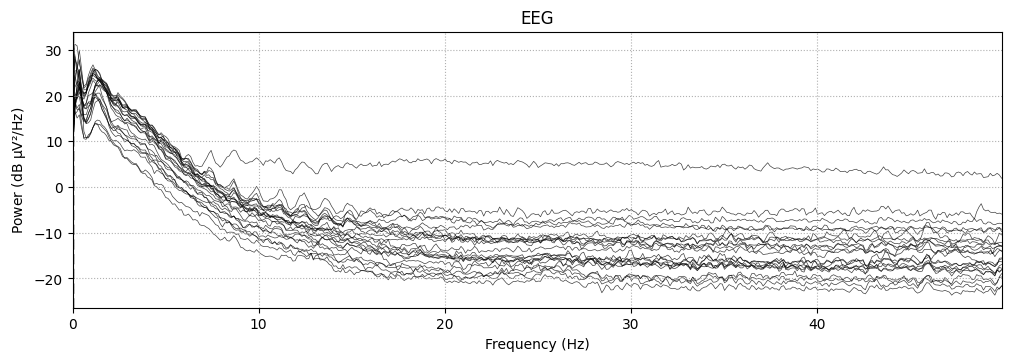

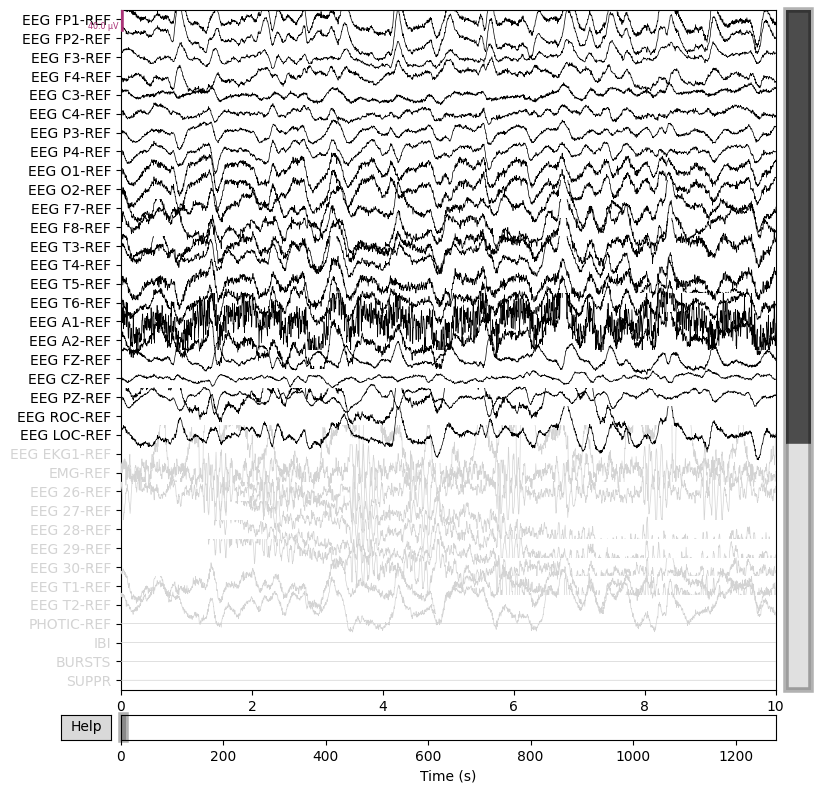

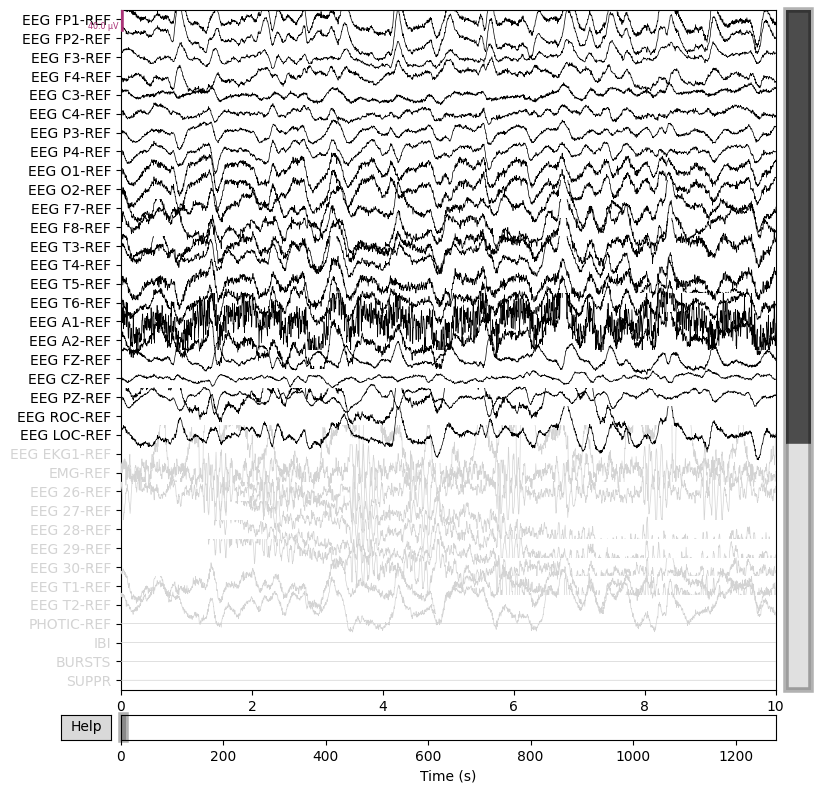

In [7]:
raw.info['bads'] = ['EEG EKG1-REF',
 'EMG-REF',
 'EEG 26-REF',
 'EEG 27-REF',
 'EEG 28-REF',
 'EEG 29-REF',
 'EEG 30-REF',
 'EEG T1-REF',
 'EEG T2-REF',
 'PHOTIC-REF',
 'IBI',
 'BURSTS',
 'SUPPR']

raw.compute_psd(fmax=50).plot(picks="data", exclude="bads", amplitude=False)
raw.plot(n_channels=36)

In [46]:
n_groups = len(files_raw)
n_samples = max(len(files_raw[0]),len(files_raw[1]))

for iGroup in range(n_groups):
   
    for iSample in range(n_samples):
        print(f'iGroup: {iGroup+1}, iSample: {iSample+1}')
        
        if iSample != 4:
            # The following channels are empty => ignore in analysis
            bads = ['PHOTIC-REF',
            'IBI',
            'BURSTS',
            'SUPPR']
            
        elif iSample == 4:
            # The 4th sample has 36 channels, discard these additional channels so we can compare apples to apples 
            bads = ['EMG-REF',
            'EEG 26-REF',
            'EEG 27-REF',
            'EEG 28-REF',
            'EEG 29-REF',
            'EEG 30-REF',
            'EEG T1-REF',
            'EEG T2-REF',
            'PHOTIC-REF',
            'IBI',
            'BURSTS',
            'SUPPR']

        # Load EDF file
        raw = mne.io.read_raw_edf(files_raw[iGroup][iSample])
        
        # Add bads
        raw.info['bads'] = bads
        
        # Crop snippet of data somewhere in the middle of the recording
        snippet_start = 10*60
        snippet_end = snippet_start + 10
        raw.crop(snippet_start, snippet_end)

        # Plot
        fig_psd = raw.compute_psd(fmax=120).plot(picks="data", exclude="bads", amplitude=False).get_figure()
        fig_raw = raw.plot(n_channels=len(raw.ch_names)).get_figure()
        
        fig_psd.savefig(f'../reports/figures/raw/psd_group{iGroup+1}_sample{iSample+1}.png', bbox_inches='tight')
        fig_raw.savefig(f'../reports/figures/raw/eeg_group{iGroup+1}_sample{iSample+1}.png', bbox_inches='tight')
        
        clear_output()

# Filtering

In [47]:
n_groups = len(files_raw)
n_samples = max(len(files_raw[0]),len(files_raw[1]))

preprocessed_eeg_list = {}
index = 0
for iGroup in range(n_groups):
   
    for iSample in range(n_samples):
        print(f'iGroup: {iGroup+1}, iSample: {iSample+1}')
        
        if iSample != 4:
            # The following channels are empty => ignore in analysis
            bads = ['EEG EKG1-REF','PHOTIC-REF',
            'IBI',
            'BURSTS',
            'SUPPR']
            
        elif iSample == 4:
            # The 4th sample has 36 channels, discard these additional channels so we can compare apples to apples 
            bads = ['EEG EKG1-REF',
            'EMG-REF',
            'EEG 26-REF',
            'EEG 27-REF',
            'EEG 28-REF',
            'EEG 29-REF',
            'EEG 30-REF',
            'EEG T1-REF',
            'EEG T2-REF',
            'PHOTIC-REF',
            'IBI',
            'BURSTS',
            'SUPPR']

        # Load EDF file
        raw = mne.io.read_raw_edf(files_raw[iGroup][iSample]).load_data()
        
        # Add bad channels to info
        raw.info['bads'] = bads

        # Filter (bandpass + notch)
        raw.filter(l_freq=0.5, h_freq=100)

        freqs = (60, 120)
        raw.notch_filter(
            freqs=freqs, method="spectrum_fit", filter_length="10s"
        )
        
        # Crop snippet of data somewhere in the middle of the recording
        snippet_start = 10*60
        snippet_end = snippet_start + 10
        raw.crop(snippet_start, snippet_end)
        
        # Plot
        fig_psd = raw.compute_psd(fmax=120).plot(picks="data", exclude="bads", amplitude=False)
        fig_raw = raw.plot(n_channels=len(raw.ch_names))
        
        fig_psd.savefig(f'../reports/figures/snippet/psd_snippet_group{iGroup+1}_sample{iSample}.png', bbox_inches='tight')
        fig_raw.savefig(f'../reports/figures/snippet/eeg_snippet_group{iGroup+1}_sample{iSample}.png', bbox_inches='tight')

        clear_output()
        
        # Add processed data to list
        preprocessed_eeg_list[index] = {'group':iGroup+1, 
                                     'sample':iSample+1,
                                     'raw':raw}
        index = index+1

In [41]:
preprocessed_eeg_list

{0: {'group': 1,
  'sample': 1,
  'raw': <RawEDF | 1_1.edf, 30 x 2501 (10.0 s), ~614 kB, data loaded>},
 1: {'group': 1,
  'sample': 2,
  'raw': <RawEDF | 1_2.edf, 30 x 2501 (10.0 s), ~614 kB, data loaded>},
 2: {'group': 1,
  'sample': 3,
  'raw': <RawEDF | 1_3.edf, 30 x 2501 (10.0 s), ~614 kB, data loaded>},
 3: {'group': 1,
  'sample': 4,
  'raw': <RawEDF | 1_4.edf, 30 x 2501 (10.0 s), ~614 kB, data loaded>},
 4: {'group': 1,
  'sample': 5,
  'raw': <RawEDF | 1_5.edf, 36 x 2501 (10.0 s), ~736 kB, data loaded>},
 5: {'group': 2,
  'sample': 1,
  'raw': <RawEDF | 2_1.edf, 30 x 2501 (10.0 s), ~614 kB, data loaded>},
 6: {'group': 2,
  'sample': 2,
  'raw': <RawEDF | 2_2.edf, 36 x 2501 (10.0 s), ~736 kB, data loaded>},
 7: {'group': 2,
  'sample': 3,
  'raw': <RawEDF | 2_3.edf, 30 x 2501 (10.0 s), ~614 kB, data loaded>},
 8: {'group': 2,
  'sample': 4,
  'raw': <RawEDF | 2_4.edf, 30 x 2501 (10.0 s), ~614 kB, data loaded>},
 9: {'group': 2,
  'sample': 5,
  'raw': <RawEDF | 2_5.edf, 36 x

# Time Frequency Analysis

In [45]:
raw = preprocessed_eeg_list[0]['raw']

freqs = np.logspace(*np.log10([6, 35]), num=8)
n_cycles = freqs / 2.0  # different number of cycle per frequency
power, itc = raw.compute_tfr(
    method="morlet",
    freqs=freqs,
    n_cycles=n_cycles,
    average=True,
    return_itc=True,
    decim=3,
)

TypeError: Got unexpected keyword arguments average, return_itc for TFR method "morlet".